In [1]:
%matplotlib inline

from IPython.display import display, Markdown,clear_output

import random
import matplotlib.pyplot as plt
from matplotlib import colors
import time
import numpy as np
import math

#%matplotlib inline
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = [5, 5]

In [2]:
# class, defining agents as abstract data types
class Bacteria:
    # init-method, the constructor method for agents
    def __init__(self,x,y,speed):
        self.x = x
        self.y = y
        self.speed=speed

    
    def move_randomwalk(self,locations):

            
        if random.choices([1,0], [self.speed,1-self.speed])[0]==1:

            next_x = (self.x + random.choice([-1,0,1]) )%len(locations) #torus space
            next_y = (self.y + random.choice([-1,0,1]) )%len(locations)


            if locations[next_x][next_y]==None:
                locations[self.x][self.y]=None
                locations[next_x][next_y]=Bacteria
                self.x = next_x
                self.y = next_y
            else:
                return


def BacCreator(size,group,groupList,field,speed,n,m):
    for j in range(0,size):
        while True:

            x = random.choice(range(0,n))
            y = random.choice(range(0,m))

            if field[x][y] == None:
                field[x][y] = Bacteria(x=x,y=y,speed=speed)
                groupList.append(field[x][y])

                break
                
def get_matrix(locations):
    matrix = [[0.0 for i in range(0,100)] for i in range(0,100)]
    # if agent is of type A, put a 1.0, if of type B, pyt a 2.0
    for i in range(1,100):
        for j in range(1,100):
            if grid[i][j] != None: # empty
                matrix[i][j] = 1.0 # 1.0 means "A"

    return matrix


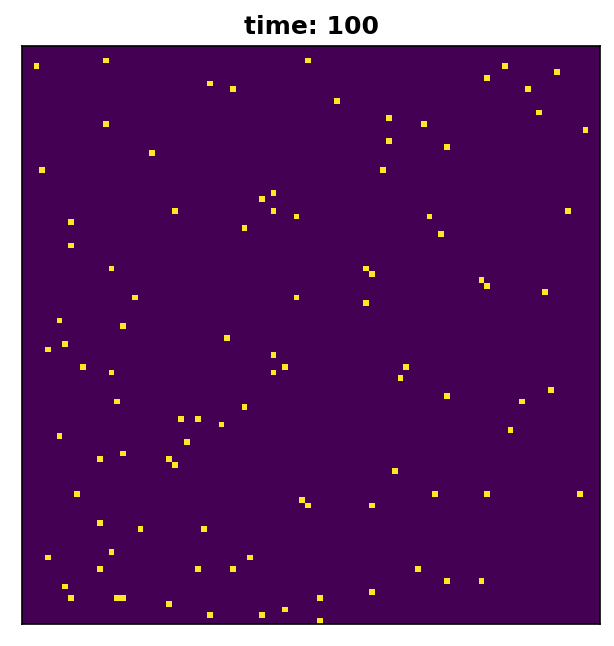

In [3]:

plt.figure(figsize=(5,6), dpi= 100)
plt.yticks([]) 
plt.xticks([]) 

grid = [[None for i in range(0,100)] for i in range(0,100)]
locations = grid.copy() 
BacteriaPop = []
BacCreator(size = 100,
            group = "Bacteria",
            groupList = BacteriaPop,
            field = locations,
            speed=1,
            n = 100,
            m = 100)

for i in range(100):
    for Indiv in BacteriaPop:

        Indiv.move_randomwalk(locations)


    clear_output(wait=True)
    plt.imshow(get_matrix(locations),interpolation='None', animated=True)
    plt.title('time: '+str(i+1),fontweight ="bold")
    plt.yticks([]) 
    plt.xticks([]) 
    plt.show()
  


## Define a class that does a brownian motion
Remember that brownian motion happens in continious space and changes in direction are sampled from a normal distribution with mean x or y and a chosen stanrdard deviation that represent the average movement of your particle.

In [4]:


# class, defining agents as abstract data types
class Bacteria:
    # init-method, the constructor method for agents
    def __init__(self,x,y,speed):
        self.x = x
        self.y = y
        self.speed=speed
        
    def move_brownian(self):

        next_x = (np.random.normal(loc=self.x, scale=np.sqrt(self.speed)) )%gridsize #torus space
        next_y = (np.random.normal(loc=self.y, scale=np.sqrt(self.speed)) )%gridsize #torus space

        self.x = next_x
        self.y = next_y


def BacCreator(size,group,groupList,speed,n,m):
    for j in range(0,size):
        x = random.choice(range(n,m))
        y = random.choice(range(n,m))

        groupList.append(Bacteria(x=x,y=y,speed=speed))

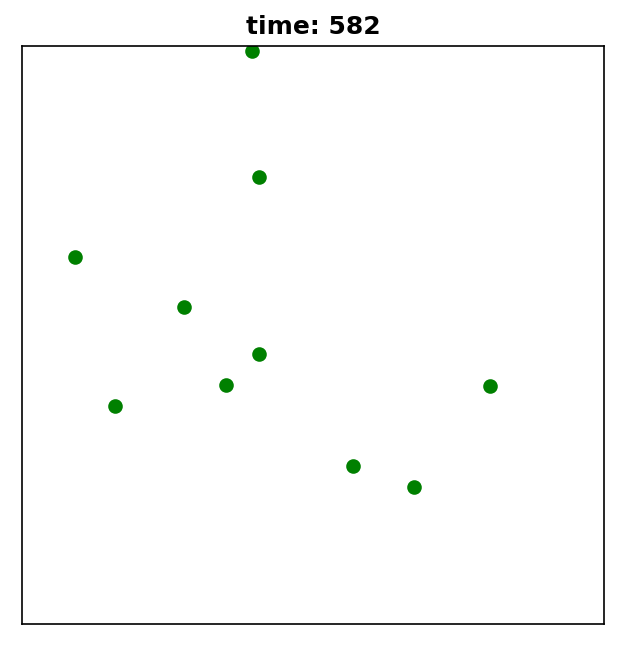

KeyboardInterrupt: 

In [5]:

gridsize=100
BacteriaPop = []
BacCreator(size = 10,
            group = "Bacteria",
            groupList = BacteriaPop,
            speed=1,
            n = 40,
            m = 50)



plt.figure(figsize=(5,6), dpi= 100)
plt.scatter([], [], color = "green")


for i in range(1000):
    for indiv in BacteriaPop:

        indiv.move_brownian()


    clear_output(wait=True)
    plt.scatter([indiv.x for indiv in BacteriaPop], [indiv.y for indiv in BacteriaPop], color = "green")
    plt.xlim(0,100)
    plt.ylim(0,100)
    plt.yticks([]) 
    plt.xticks([]) 
    plt.title('time: '+str(i+1),fontweight ="bold")
    plt.pause(0.01)

  


In [ ]:
import matplotlib.animation as animation
gridsize=100
BacteriaPop = []
BacCreator(size = 10,
            group = "Bacteria",
            groupList = BacteriaPop,
            speed=1,
            n = 40,
            m = 50)



fig, ax = plt.subplots()


def simulate(i):
    for indiv in BacteriaPop:

        indiv.move_brownian()

    ax.clear()
    ax.scatter([indiv.x for indiv in BacteriaPop], [indiv.y for indiv in BacteriaPop])
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    plt.yticks([]) 
    plt.xticks([]) 
    plt.title('time: '+str(i+1),fontweight ="bold")
    
ani = animation.FuncAnimation(fig, simulate, frames=100, interval=1)
ani.save('brownianmotion.gif', writer='pillow')


## Modelling run-and-tumble motion of bacteria

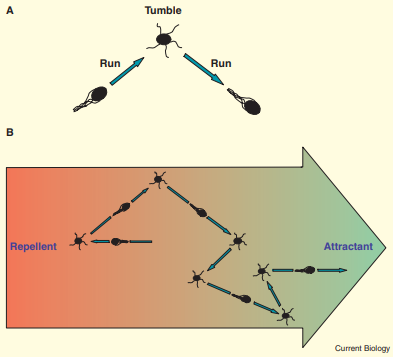  
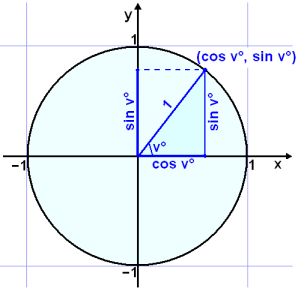

https://www.cell.com/current-biology/pdf/S0960-9822(02)01424-0.pdf


In [19]:
# class, defining agents as abstract data types

class bacteria:
    # init-method, the constructor method for agents
    def __init__(self,x,y,speed,angle,tumble_rate):
        self.x = x
        self.y = y
        self.angle = angle
        
        self.tumble_rate=tumble_rate #between 0,1 determine on whether you want to tumble
        self.speed=speed
        
        self.past_surroundings=0 #past level environment

    def tumble(self):
        if random.choices([1,0], [self.tumble_rate,1-self.tumble_rate])[0]==1:
            self.angle = random.uniform(0.0, 2.0 * math.pi)
        
    def run(self):
        next_x = (self.x + (np.random.exponential(self.speed) * np.cos(self.angle)))%gridsize #torus space
        next_y = (self.y + (np.random.exponential(self.speed) * np.sin(self.angle)))%gridsize #torus space

        self.x = next_x
        self.y = next_y

    def sense_surroundings(self): #determine vurrent concentration of compound at self.x,self.y
        return  1/(100+5*((self.x-50)**2+(self.y-50)**2))

        
    def chemotaxis_tumble(self):

        if self.sense_surroundings()<self.past_surroundings: #compare past and current environment
            if random.choices([1,0], [self.tumble_rate,1-self.tumble_rate])[0]==1: #if environment worse, tumble with tumble rate
                self.angle = random.uniform(0.0, 2.0 * math.pi)
            self.past_surroundings=self.sense_surroundings() #update memory

        else:
            self.past_surroundings=self.sense_surroundings() #update memory


def BactCreator(size,group,groupList,speed,tumble_rate,n,m):
    for j in range(0,size):
        x = random.choice(range(n,m))
        y = random.choice(range(n,m))
        angle=random.uniform(0.0, 2.0 * math.pi)
        groupList.append(bacteria(x=x,y=y,speed=speed,tumble_rate=tumble_rate,angle=angle))
        
        


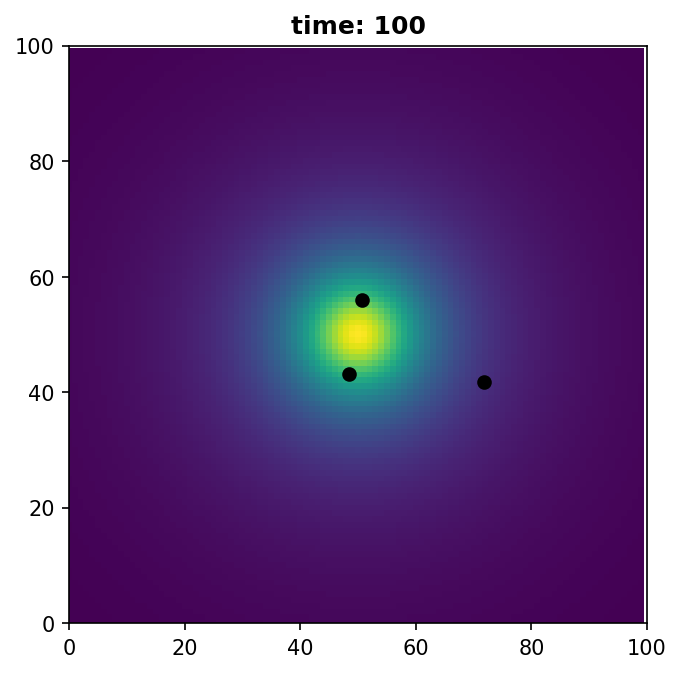

In [20]:
gridsize=100
Bacteria = []
BactCreator(size = 3,
            group = "Bacteria",
            groupList = Bacteria,
            tumble_rate=1,
            speed=1,
            n = 0,
            m = 1)


#Simulate the gradient distribution
conc_matrix = [[0 for i in range(0,100)] for i in range(0,100)]
for x in range(100):
    for y in range(100):
        conc_matrix[x][y] = 1/(100+((x-50)**2+(y-50)**2))
xy_simu = np.array(conc_matrix).T


for i in range(100):
    for indiv in Bacteria:
        indiv.chemotaxis_tumble()
        indiv.run()   
            

    clear_output(wait=True)
    plt.imshow(xy_simu)
    plt.scatter([Bac.x for Bac in Bacteria], [Bac.y for Bac in Bacteria], color = "black")
    plt.xlim(0,gridsize)
    plt.ylim(0,gridsize)
    #plt.yticks([]) 
    #plt.xticks([]) 
    plt.title('time: '+str(i+1),fontweight ="bold")
    plt.pause(0.01)


In [23]:
from IPython.display import display, Markdown,HTML
display(Markdown("### Chemotaxis of Bacteria attracted to sugar"))
HTML('<iframe width="560" height="315" src="https://www.youtube-nocookie.com/embed/F6QMU3KD7zw?controls=0" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

### Chemotaxis of Bacteria attracted to sugar